In [1]:
# LIBRARIES #
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import io
import sklearn
import sklearn.metrics  as metrics
from google.colab import files
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
%matplotlib inline

In [2]:
# READ CSV #
warnings.filterwarnings('ignore')
data = pd.read_csv('student-por.csv', sep=',') 

In [3]:
# FIRST APPROACH TO THE DATASET #

# columns names #
data_names = ['school', 'sex', 'age', 'address', 'family_size', 'parent_cohabition_status', 'mother_education', 'father_education','mother_job', 'father_job', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'school_support', 'family_support', 'paid', 'extra_curricular_activities', 'nursery', 'higher', 'internet_access', 'romantic', 'famrel', 'freetime', 'going_out', 'workday_alcohol', 'weekend_alcohol', 'health', 'absences','grade_period1', 'grade_period2', 'final_grade' ]
data.columns = data_names

# numerical vs categorical columns #
numerical_columns = ['age', 'mother_education', 'father_education', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'going_out', 'workday_alcohol', 'weekend_alcohol', 'health', 'absences','grade_period1', 'grade_period2', 'final_grade']
categorical_columns = ["school","sex",'address', 'family_size', 'parent_cohabition_status','mother_job', 'father_job', 'reason', 'guardian',"school_support", "family_support",'paid', 'extra_curricular_activities', 'nursery', 'higher', 'internet_access', 'romantic']


In [4]:
# CLEAN THE DATABASE # 

# 1. Drop the columns that we are not going to use.
data_clean = data.drop(['grade_period1', 'grade_period2'], axis=1)

# 2. Drop na's.
data_clean=data.replace(r'^\s*$', np.nan, regex=True)
data_clean=data_clean.dropna(inplace=True)

# 3. Get the dummies so that it is easier to work. 
# This is, transform the categorical columns into numerical ones. 
data_clean = pd.get_dummies(data, columns=categorical_columns)
data_clean.columns
data_clean.describe()

# 4. Transform the data. 
# we need to standarize the data to take into consideration variations in measurments, units and scales. 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_clean[numerical_columns])
scaled_dataframe = pd.DataFrame(scaled_data, columns = numerical_columns)  
print(scaled_dataframe.columns)
scaled_dataframe.head()

for column in numerical_columns:
  data_clean.append(scaled_dataframe[column])
  data_clean[column] = scaled_dataframe[column]

data_clean

Index(['age', 'mother_education', 'father_education', 'traveltime',
       'studytime', 'failures', 'famrel', 'freetime', 'going_out',
       'workday_alcohol', 'weekend_alcohol', 'health', 'absences',
       'grade_period1', 'grade_period2', 'final_grade'],
      dtype='object')


,age,mother_education,father_education,traveltime,studytime,failures,famrel,freetime,going_out,workday_alcohol,...,extra_curricular_activities_no,extra_curricular_activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_access_no,internet_access_yes,romantic_no,romantic_yes
0,1.031695,1.310216,1.540715,0.576718,0.083653,-0.374305,0.072606,-0.171647,0.693785,-0.543555,...,1,0,0,1,0,1,1,0,1,0
1,0.210137,-1.336039,-1.188832,-0.760032,0.083653,-0.374305,1.119748,-0.171647,-0.157380,-0.543555,...,1,0,1,0,0,1,0,1,1,0
2,-1.432980,-1.336039,-1.188832,-0.760032,0.083653,-0.374305,0.072606,-0.171647,-1.008546,0.538553,...,1,0,0,1,0,1,0,1,1,0
3,-1.432980,1.310216,-0.278983,-0.760032,1.290114,-0.374305,-0.974536,-1.123771,-1.008546,-0.543555,...,0,1,0,1,0,1,0,1,0,1
4,-0.611422,0.428131,0.630866,-0.760032,0.083653,-0.374305,0.072606,-0.171647,-1.008546,-0.543555,...,1,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1.853254,-0.453954,0.630866,-0.760032,1.290114,1.312667,1.119748,0.780478,-1.008546,-0.543555,...,0,1,1,0,0,1,0,1,1,0
645,1.031695,0.428131,-1.188832,-0.760032,0.083653,-0.374305,0.072606,-0.171647,0.693785,-0.543555,...,1,0,0,1,0,1,0,1,1,0
646,1.031695,-1.336039,-1.188832,0.576718,0.083653,-0.374305,-3.068820,-2.075896,-1.859711,-0.543555,...,0,1,0,1,0,1,1,0,1,0
647,0.210137,0.428131,-1.188832,0.576718,-1.122808,-0.374305,-2.021678,0.780478,1.544950,1.620662,...,1,0,1,0,0,1,0,1,1,0


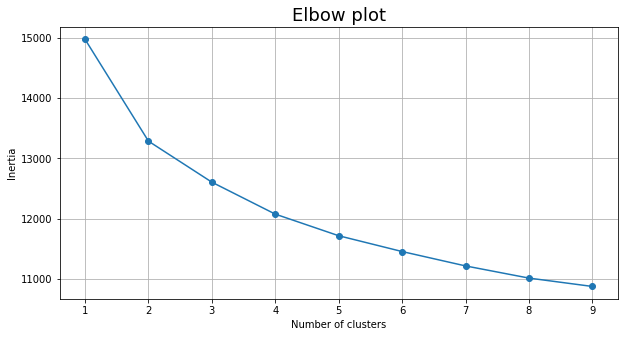



Silhouette method:
Silhouette score for k (clusters) = 2 is 0.11333391509438047
Silhouette score for k (clusters) = 3 is 0.06752484686386223
Silhouette score for k (clusters) = 4 is 0.07199776784435709
Silhouette score for k (clusters) = 5 is 0.05725816099761751
Silhouette score for k (clusters) = 6 is 0.049017575590438046
Silhouette score for k (clusters) = 7 is 0.0473258108480826
Silhouette score for k (clusters) = 8 is 0.04775985824607974
Silhouette score for k (clusters) = 9 is 0.04290048844251386


In [5]:
# CHOOSING THE OPTIMAL K VALUE #
# there is various methods to choose the optimun value of k. We'll start using the elbow plot method,
# and then proceed to the silhouette method. 
# The Elbow Method is more of a decision rule, while the Silhouette is a metric used for validation while clustering. 

# 1. ELBOW PLOT
# the elbow plot alows us to plot inercia (measure of how well the data was clustered by the KM alg) against the number of clusters. 
def optimise_k(data,max_k):
  means=[]
  inertias=[]
  for k in range(1,max_k):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(data)
    means.append(k)
    inertias.append(kmeans.inertia_)

  fig=plt.subplots(figsize=(10,5))
  plt.plot(means,inertias,"o-")
  plt.xlabel("Number of clusters")
  plt.ylabel("Inertia")
  plt.grid(True)
  plt.title("Elbow plot", size=18)
  plt.show()

optimise_k(data_clean,10)
# Optimun value of k: 4. 

# 2. THE SILHOUETTE METHOD
# The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation).
print("\n")
print("Silhouette method:")
for i in range(2,10):
  labels=cluster.KMeans(n_clusters=i, init="k-means++",random_state=200).fit(data_clean).labels_
  print("Silhouette score for k (clusters) = "+str(i)+" is " + str(metrics.silhouette_score(data_clean,labels,metric="euclidean", sample_size=1000,random_state=200)))



(58, 58)


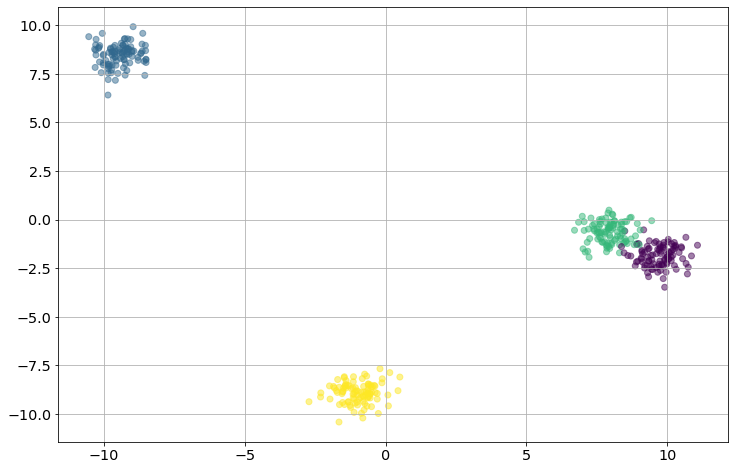

In [53]:
X = data_clean.drop('final_grade', axis=1)
y = data_clean['final_grade']

# Compute the covariance matrix of the features
cov_matrix = np.cov(X.T)

print(cov_matrix.shape)    # (num_features, num_features) = (58,58)


# Generate data using make_blobs
X,y = make_blobs(n_samples = 395, n_features = 58, cluster_std = X.std().mean(), centers=4)

params = {'legend.fontsize': 'x-large','figure.figsize': (12, 8),
         'axes.labelsize': 'x-large','axes.titlesize':'x-large',
         'xtick.labelsize':'x-large','ytick.labelsize':'x-large'}
plt.rcParams.update(params)

fig, ax = plt.subplots()
plt.scatter(X[:,0],X[:,1],alpha=0.5,c=y)
plt.grid(); plt.show()

Since we do not know the true clusters in this case, we cannot use this plot to visually check if the generated clusters match the true clusters. However, this plot can still be useful for exploring the structure of the data and identifying any potential patterns or separations in the data.